To cluster the documents and annotate the clusters according to the main topic, we can use various natural language 
processing and machine learning techniques. Here is a general framework that can be used to accomplish this task:

1.Load the dataset into a pandas dataframe.
2.Clean the data by removing any null values or duplicates.
3.Preprocess the textual data (i.e., the abstracts) by removing stopwords, punctuation, and other noise. This can be done using various libraries like NLTK or spaCy.
4.Convert the preprocessed abstracts into a numerical representation using a technique like TF-IDF or Doc2Vec.
5. Find the relevant document 
6.To find the main topic of each document, we will use a topic modeling algorithm such as Latent Dirichlet Allocation (LDA) or Non-negative Matrix Factorization (NMF)
6.For clustering and visualization, we will use a dimensionality reduction technique such as Principal Component Analysis (PCA) or t-SNE, and a visualization library such as bokeh.''' 

In [4]:

import nltk 
from nltk.tokenize import word_tokenize,sent_tokenize

'''Pakages to load dataset'''
import pandas as pd

import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.models import HoverTool


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 


nltk.download('punkt')
nltk.download('stopwords')

from sklearn.metrics.pairwise import cosine_similarity



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sitas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sitas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
data = pd.read_csv("Data_mesh_cleaned.csv")
pdf_data = data.copy()


In [7]:
def NMF_modeling(df_data,components):
    
    df = df_data.copy()
    
 
    model = TfidfVectorizer(stop_words='english', max_df = 0.8, ngram_range=(2,3))
    word_vector = normalize(model.fit_transform(df['pdf_content']))
    nmf_model = NMF(n_components= components, init='nndsvd')
    nmf_model.fit(word_vector)
    df['topic'] = nmf_model.transform(word_vector).argmax(axis=1)
    
    topic_words = []
    n_words = 50
    
    feature_names = model.get_feature_names_out()
    for topic_idx, topic in enumerate(nmf_model.components_):
        top_words_idx = topic.argsort()[:-n_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        topic_words.append(', '.join(top_words))

    df['topic_words'] = [topic_words[i] for i in df['topic']]
    
    # Transform the topic_words column into a TF-IDF matrix
    tfidf_matrix = model.transform(df['topic_words'])
    dominant_words = []
    for i in range(len(df)):
        row = tfidf_matrix[i]
        dominant_word_idx = row.argmax()
        dominant_word = model.get_feature_names_out()[dominant_word_idx]
        dominant_words.append(dominant_word)

    # Add the dominant_word column to the DataFrame
    df['dominant_word'] = dominant_words
    
    return df

In [32]:
from sklearn.decomposition import LatentDirichletAllocation

def LDA_modeling(df_data, components):
    df = df_data.copy()

    # Create a TF-IDF vectorizer
    vectorizer = TfidfVectorizer(stop_words='english')
    word_vector = vectorizer.fit_transform(df['pdf_content'])

    # Fit an LDA model
    lda_model = LatentDirichletAllocation(n_components=components, random_state=42)
    lda_model.fit(word_vector)

    # Assign topics to documents
    df['topic'] = lda_model.transform(word_vector).argmax(axis=1)

    # Get top words for each topic
    topic_words = []
    n_words = 10
    feature_names = vectorizer.get_feature_names_out()
    
    for topic_idx, topic in enumerate(lda_model.components_):
        top_words_idx = topic.argsort()[:-n_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        topic_words.append(', '.join(top_words))

    df['topic_words'] = [topic_words[i] for i in df['topic']]

 
    tfidf_matrix = vectorizer.transform(df['topic_words'])
    
    
    dominant_words = []
    for i in range(len(df)):
        row = tfidf_matrix[i]
        dominant_word_idx = row.argmax()
        dominant_word = feature_names[dominant_word_idx]
        dominant_words.append(dominant_word)
    df['dominant_word'] = dominant_words

    return df



In [9]:
result = NMF_modeling(pdf_data, components = 20)

In [10]:
result

,pdf_name,pdf_content,topic,topic_words,dominant_word
0,0670.pdf,introducing city platform design marcin kryste...,12,"digital twin, user scenario, number different,...",center poznań
1,1-s2.0-S1877050921022365-main.pdf,com author http creativecommons license scient...,19,"inês araújo, araújo inês araújo, inês araújo i...",araújo inês
2,1-s2.0-S1877050923006099-main.pdf,com author http creativecommons license scient...,8,"monitoring product, self serve infrastructure,...",designing monitoring
3,2302.01713.pdf,best practice avoid mess jan bode ibm germany ...,2,"motivational factor, challenge best practice, ...",com ibm
4,2304.01062.pdf,systematic gray abel goedegebuure indika kumar...,0,"manuscript submitted, composite product, self ...",id frequency
5,978-1-4842-9253-2.pdf,fabric approach ai guide ai cataloging integra...,16,"knowledge catalog, ai ml, chapter fabri, hybri...",ai lifecycle
6,978-3-031-12423-5_7.pdf,cok survey privacy challenge relation mesh nik...,14,"quasi identi, di erential privacy, erential pr...",challenge relation
7,978-3-031-36118-0.pdf,lecture note engineering communication technol...,6,"infrared image, classi cation, neural network,...",ag hu
8,978-3-031-39847-6_1.pdf,integration revitalized warehouse lake robert ...,17,"di process, integration warehouse, black box, ...",big dolap
9,978-3-031-45021-1_23.pdf,converging microservice principle uni ed logic...,15,"azure lake, microservice principle, high high,...",element required


In [23]:
word_list = result['topic_words'].str.split(',').explode().tolist()

In [24]:
len(word_list)

1350

In [35]:
import matplotlib.pyplot as plt
from collections import Counter

In [36]:
# Use Counter to count word frequencies
word_count = Counter(word_list)

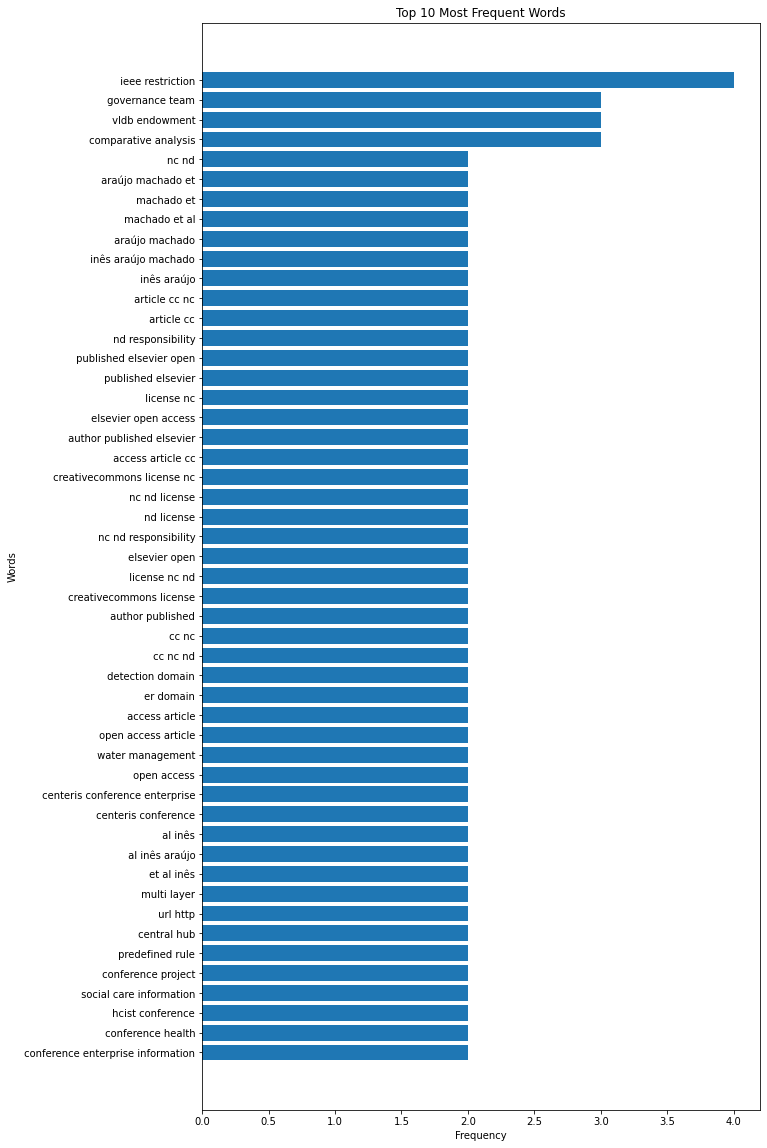

In [38]:
# Get the 10 most common words
most_common_words = word_count.most_common(50)

# Extract the words and their frequencies
words, frequencies = zip(*most_common_words)

# Create a bar plot
plt.figure(figsize=(10, 20))
plt.barh(words, frequencies)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 10 Most Frequent Words')
plt.gca().invert_yaxis()  # Invert the y-axis to have the most frequent word at the top
plt.show()

In [28]:
words

(' ieee restriction',
 ' governance team',
 ' vldb endowment',
 ' comparative analysis',
 'nc nd',
 ' araújo machado et',
 ' machado et',
 ' machado et al',
 ' araújo machado',
 ' inês araújo machado',
 ' inês araújo',
 ' article cc nc',
 ' article cc',
 ' nd responsibility',
 ' published elsevier open',
 ' published elsevier',
 ' license nc',
 ' elsevier open access',
 ' author published elsevier',
 ' access article cc',
 ' creativecommons license nc',
 ' nc nd license',
 ' nd license',
 ' nc nd responsibility',
 ' elsevier open',
 ' license nc nd',
 ' creativecommons license',
 ' author published',
 ' cc nc',
 ' cc nc nd',
 ' detection domain',
 ' er domain',
 ' access article',
 ' open access article',
 ' water management',
 ' open access',
 ' centeris conference enterprise',
 ' centeris conference',
 ' al inês',
 ' al inês araújo',
 ' et al inês',
 ' multi layer',
 ' url http',
 ' central hub',
 ' predefined rule',
 ' conference project',
 ' social care information',
 ' hcist confe

In [29]:
import csv
csv_file_path = "words2.csv"

# Writing to CSV file
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write header
    writer.writerow(['Word'])
    # Write words with spaces
    for words_row in words:
        # Split words and write to CSV
        words = words_row.split()
        for word in words:
            writer.writerow([word])

print(f"CSV file '{csv_file_path}' created successfully.")


CSV file 'words2.csv' created successfully.
